In [ ]:
# Importando as bibliotecas
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import plotly.express as px

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# O que o K-means Clustering faz?

É um tipo de aprendizado não supervisionado, que é utilizado quando você não possui dados rotulados, e o objetivo deste algoritmo é encontrar grupo nos dados e estes grupos são representados pela variável K. O algoritmo funciona iterativamente para atribuir cada ponto de dado a um dos K grupos com base nos recursos fornecidos, e os pontos de dados são agrupados com base na similaridade dos recursos.

Os resultados do algoritmo são:


- Os Centróides dos clusters K, que podem ser utilizados para rotular dados novos
- Rotulamento para os dados de treinamento, cada ponto de dado é atribuído a um único cluster

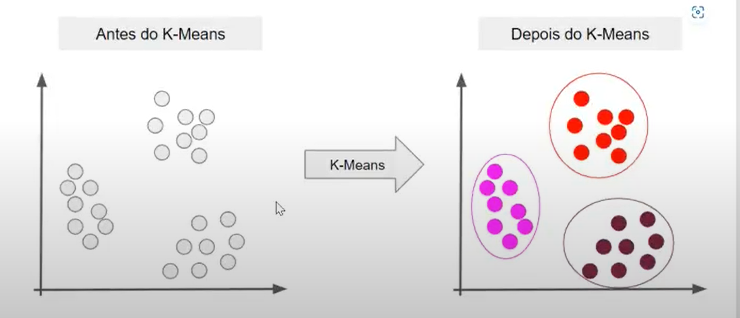

# Aplicações


O K-means é utilizado para encontrar grupos que não foram claramente rotulados nos dados, também pode ser utilizado para confirmar suposições de negócios sobre quais tipos de grupos existem ou até mesmo identificar grupos desconhecidos em conjuntos de dados complexos, depois que o algoritmo é executado e os grupos definidos, qualquer dado novo pode ser atribúido ao grupo correto facilmente.

Alguns casos de uso:
- Segmentar por histórico de compras
- Segmentatar por atividades em um website
- Definir personas com base em interesses
- Detecção de anomalias

# Funcionamento


- O K-means começa com a escolha do número de K, o K significa o número de clusters que o algoritmo encontraria no conjunto de dados, escolher o número de K corretamente é muito importante, em alguns casos o K será vísivel no conjunto de dados, mas, na maioria das vezes não será esse o caso.


- 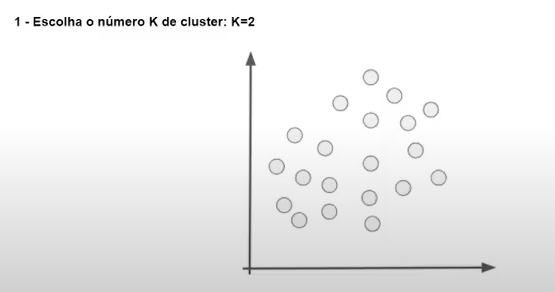



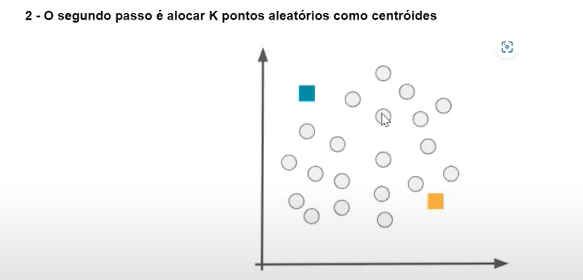

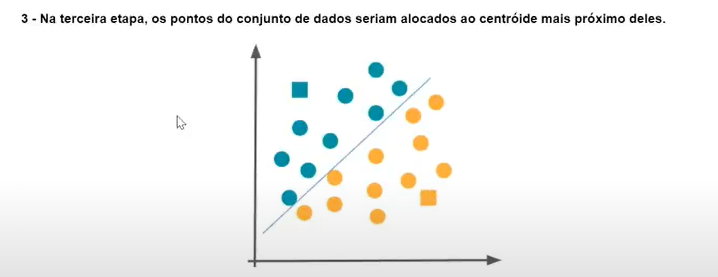

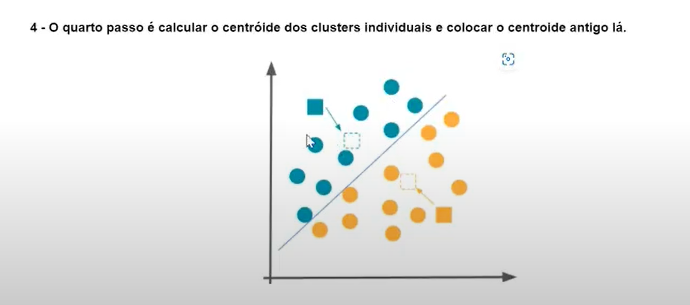

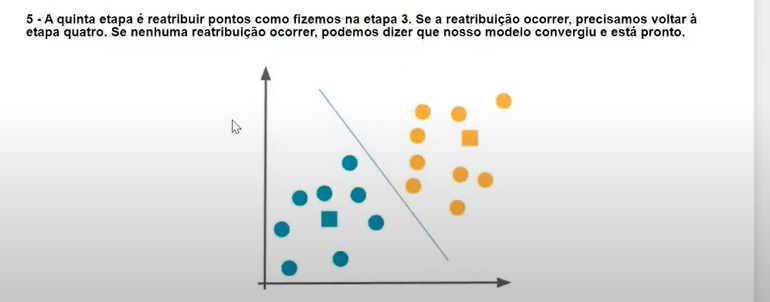

# Escolhendo o K



A forma de avaliar a escolha de K é feita por meio de um parâmetro conhecido como WCSS. WCSS significa Within Cluster Sum of Squares. Abaixo está a representação da fórmula, por exemplo, quando K = 3
Summation Distance(p,c) é a soma da distância dos pontos em um cluster do centróide.

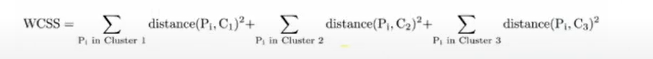

Um Método muito utilizado para escolher o melhor valor de K é o método do cotovelo. Na representação abaixo, podemos ver que depois de 6 não há diminuição significativa no WCSS, então 6 é o melhor aqui. Portanto, há uma forma de cotovelo que se forma e geralmente é uma boa ideia escolher o número onde esse cotovelo é formado.

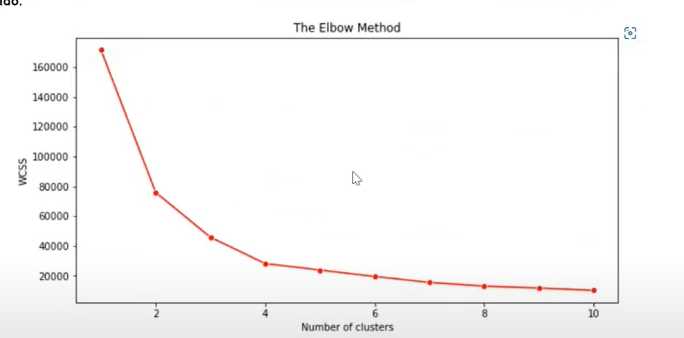

In [ ]:
# Importando base de dados
df = pd.read_csv('/content/drive/MyDrive/machine learning/dataset/Mall_Customers.csv')

In [ ]:
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
127,128,Male,40,71,95
30,31,Male,60,30,4
74,75,Male,59,54,47
139,140,Female,35,74,72
3,4,Female,23,16,77


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


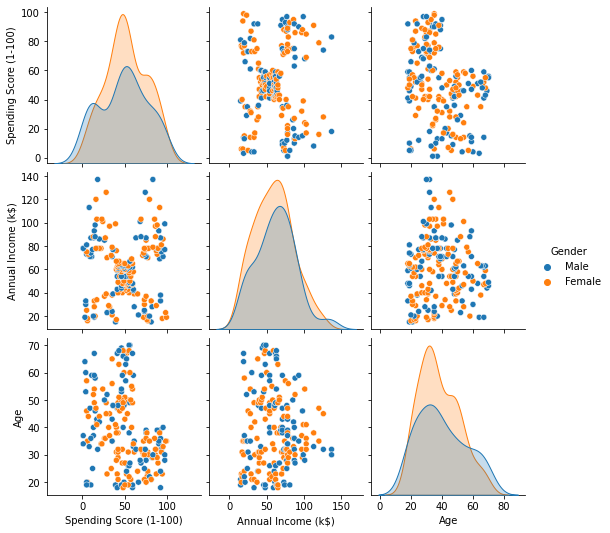

In [ ]:
# ANalisando relações entre variaveis
sns.pairplot(df, vars=['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue='Gender')

In [ ]:
# Relação idade x score
fig = px.scatter(df, x = 'Age', y = 'Spending Score (1-100)', title = 'idade x scote')
fig.show()

In [ ]:
# Relação renda x score
fig = px.scatter(df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', title = 'idade x scote')
fig.show()

In [ ]:
# Relação renda x score x sexo
fig = px.scatter(df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', title = 'idade x scote', color = 'Gender')
fig.show()

In [ ]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [ ]:
# Gerando os boxplots
lista_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for c in lista_cols:
  fig = px.box(df, y = c, x= 'Gender', title = c)
  fig.show()

In [ ]:
df[df['Annual Income (k$)']  > 126] # 126 é a media, quem  ta acima vai ser outlier

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


# Metodo do cotovelo

In [ ]:
# Separando os dados(idade e spending score)

X = df[['Age', 'Spending Score (1-100)']].iloc[:, :].values

In [ ]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [ ]:
# Rodando o metodo do cotovelo
wcss = []
for c in range(1, 11):
  kmeans = KMeans(n_clusters=c, init='k-means++', random_state=42) # 'k-means' elimina a aleatoriedade dos primeiros pontos que separam os grupos
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
lista = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(10,5))
px.line(x = lista, y = wcss)

<Figure size 720x360 with 0 Axes>

In [ ]:
# Treinando o modelo

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X) # A qual cluster cada linha pertence

In [ ]:
y_kmeans

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [ ]:
df['cluster'] = pd.DataFrame(y_kmeans)
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
25,26,Male,29,28,82,2
114,115,Female,18,65,48,3
91,92,Male,18,59,41,3
60,61,Male,70,46,56,0
151,152,Male,39,78,88,2


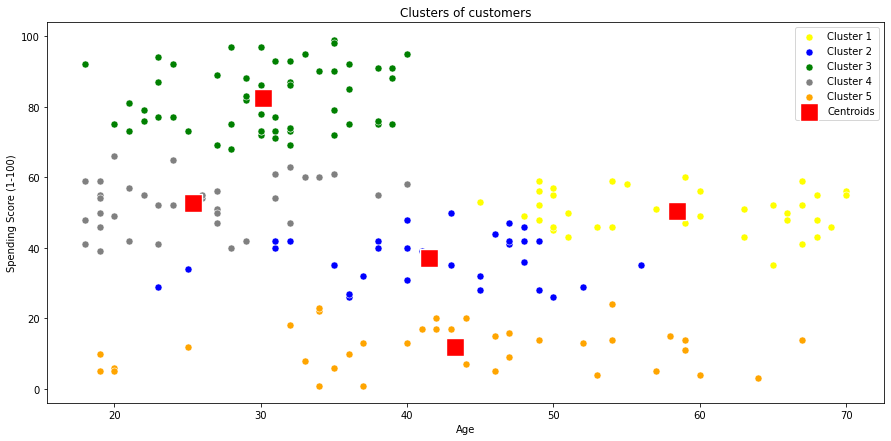

In [ ]:
plt.figure(figsize=(15,7))
# y_kmeans == a,b (a = cluster, b = coluna)
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red',
                label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()



In [ ]:
# Analisando o cluster 1
cluster_1 = df[df['cluster'] == 0]
cluster_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
40,41,Female,65,38,35,0
46,47,Female,50,40,55,0
50,51,Female,49,42,52,0
53,54,Male,59,43,60,0
54,55,Female,50,43,45,0
56,57,Female,51,44,50,0
57,58,Male,69,44,46,0
59,60,Male,53,46,46,0
60,61,Male,70,46,56,0
62,63,Female,67,47,52,0


In [ ]:
cluster_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,36.000000,36.000000,36.000000,36.000000,36.0
mean,82.444444,58.444444,53.888889,50.527778,0.0
std,23.701048,8.008725,8.710512,5.896663,0.0
min,41.000000,45.000000,38.000000,35.000000,0.0
25%,62.500000,50.000000,46.750000,46.000000,0.0
50%,79.000000,59.000000,54.000000,50.500000,0.0
75%,105.500000,66.250000,62.250000,55.250000,0.0
max,120.000000,70.000000,67.000000,60.000000,0.0


In [ ]:
# Analisando o cluster 4
cluster_4 = df[df['cluster'] == 3]
cluster_4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,35.000000,35.000000,35.000000,35.000000,35.0
mean,82.142857,25.400000,53.028571,52.685714,3.0
std,35.590930,6.208154,14.701912,7.391455,0.0
min,1.000000,18.000000,15.000000,39.000000,3.0
25%,56.000000,19.500000,44.500000,47.500000,3.0
50%,85.000000,24.000000,54.000000,54.000000,3.0
75%,105.000000,30.000000,62.000000,58.500000,3.0
max,170.000000,40.000000,87.000000,66.000000,3.0


In [ ]:
cluster2 = df[df['cluster'] == 1]
cluster2.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,33.000000,33.000000,33.000000,33.000000,33.0
mean,91.757576,41.484848,57.212121,37.000000,1.0
std,54.704336,7.778662,24.970930,6.759253,0.0
min,5.000000,23.000000,17.000000,26.000000,1.0
25%,45.000000,36.000000,39.000000,32.000000,1.0
50%,86.000000,43.000000,54.000000,36.000000,1.0
75%,127.000000,48.000000,71.000000,42.000000,1.0
max,197.000000,56.000000,126.000000,50.000000,1.0


# Adicionando renda a nossa analise

botando mais uma variavel

In [ ]:
# Adicionando resta
X = df[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].iloc[:, :].values

In [ ]:
# Rodando o metodo do cotovelo
wcss = []
for c in range(1, 15):
  kmeans = KMeans(n_clusters=c, init='k-means++', random_state=42) # 'k-means' elimina a aleatoriedade dos primeiros pontos que separam os grupos
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

lista = [1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14]
plt.figure(figsize=(10,5))
px.line(x = lista, y = wcss)

<Figure size 720x360 with 0 Axes>

In [ ]:
# Treinando o modelo

kmeans = KMeans(n_clusters=8, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X) # vai retornar A qual cluster cada linha pertence

In [ ]:
df['cluster'] = pd.DataFrame(y_kmeans)
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
136,137,Female,44,73,7,0
89,90,Female,50,58,46,1
6,7,Female,35,18,6,4
36,37,Female,42,34,17,4
55,56,Male,47,43,41,1


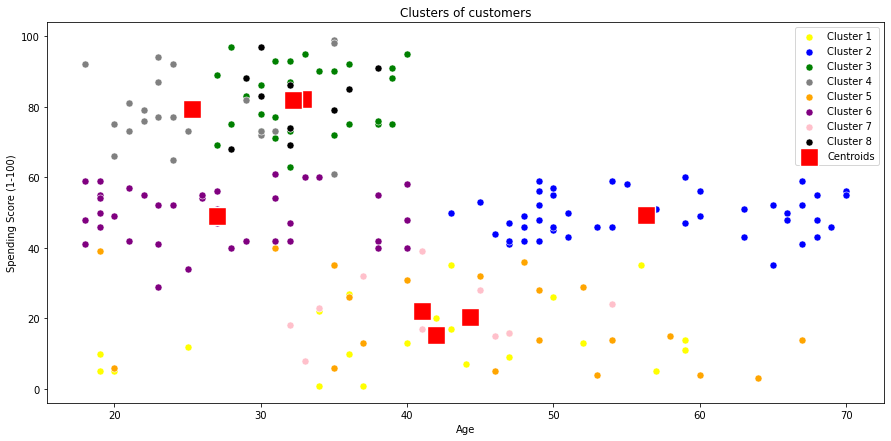

In [ ]:
plt.figure(figsize=(15,7))
# y_kmeans == a,b (a = cluster, b = coluna)
sns.scatterplot(x=X[y_kmeans == 0, 0], y=X[y_kmeans == 0, 1], color='yellow', label='Cluster 1', s=50)
sns.scatterplot(x=X[y_kmeans == 1, 0], y=X[y_kmeans == 1, 1], color='blue', label='Cluster 2', s=50)
sns.scatterplot(x=X[y_kmeans == 2, 0], y=X[y_kmeans == 2, 1], color='green', label='Cluster 3', s=50)
sns.scatterplot(x=X[y_kmeans == 3, 0], y=X[y_kmeans == 3, 1], color='grey', label='Cluster 4', s=50)
sns.scatterplot(x=X[y_kmeans == 4, 0], y=X[y_kmeans == 4, 1], color='orange', label='Cluster 5', s=50)
sns.scatterplot(x=X[y_kmeans == 5, 0], y=X[y_kmeans == 5, 1], color='purple', label='Cluster 6', s=50)
sns.scatterplot(x=X[y_kmeans == 6, 0], y=X[y_kmeans == 6, 1], color='pink', label='Cluster 7', s=50)
sns.scatterplot(x=X[y_kmeans == 7, 0], y=X[y_kmeans == 7, 1], color='black', label='Cluster 8', s=50)

sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color='red',
                label='Centroids', s=300, marker=',')

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
fig = px.scatter(df, x="Annual Income (k$)", y="Spending Score (1-100)", title="Renda x Score", color="cluster") #agora oque separará pela cor ser ao cluster
fig.show()

In [ ]:
cluster4 = df[df['cluster'] == 4]
cluster4.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
count,22.000000,22.000000,22.000000,22.000000,22.0
mean,22.181818,44.318182,25.772727,20.272727,4.0
std,13.290299,12.800247,7.646548,12.947446,0.0
min,1.000000,19.000000,15.000000,3.000000,4.0
25%,11.500000,35.250000,19.250000,7.750000,4.0
50%,22.000000,45.500000,24.500000,16.000000,4.0
75%,32.500000,52.750000,32.250000,31.750000,4.0
max,45.000000,67.000000,39.000000,40.000000,4.0


In [ ]:
kmeans.fit_predict([[31,15,80], [58,40,30], [18,16,6], [67,50,55], [28,90,70],[19,10,6], [70,100,90], [37,70,80]])

array([3, 1, 2, 5, 6, 7, 0, 4], dtype=int32)